## Problem:

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

#### Data set for the Problem: Sparkling.csv and Rose.csv
#### Please do perform the following questions on each of these two data sets separately.


In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
import warnings
warnings.filterwarnings("ignore")

##### 1.Read the data as an appropriate Time Series data and plot the data.
##### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
##### 3.Split the data into training and test. The test data should start in 1991.
##### 4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.
##### 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. (Note: Stationarity should be checked at alpha = 0.05.)
##### 6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
##### 7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
##### 8.Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
##### 9.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
##### 10.Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

## 1.Readind the data for Sparkling

In [2]:
df = pd.read_csv("Sparkling.csv")
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
print(df.head())
print('\n')
print(df.tail())

  YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471


    YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031


In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [6]:
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df = df.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


## 2.EDA

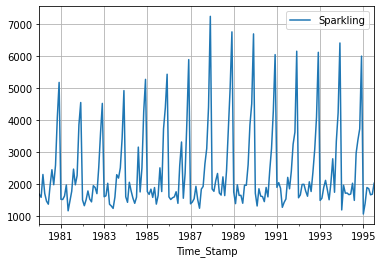

In [7]:
df.plot();
plt.grid()

In [8]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [9]:
df.isnull().sum()

Sparkling    0
dtype: int64

#### Yearly Boxplot

In [10]:
import seaborn as sns

In [11]:
df_1 = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)

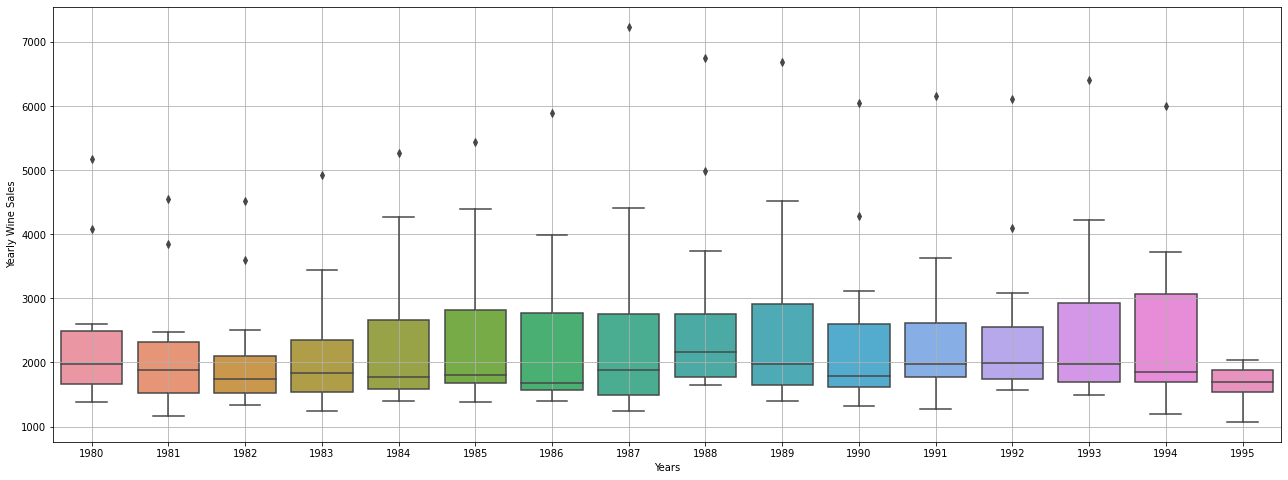

In [12]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid(); 
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales');

#### Monthly Plot

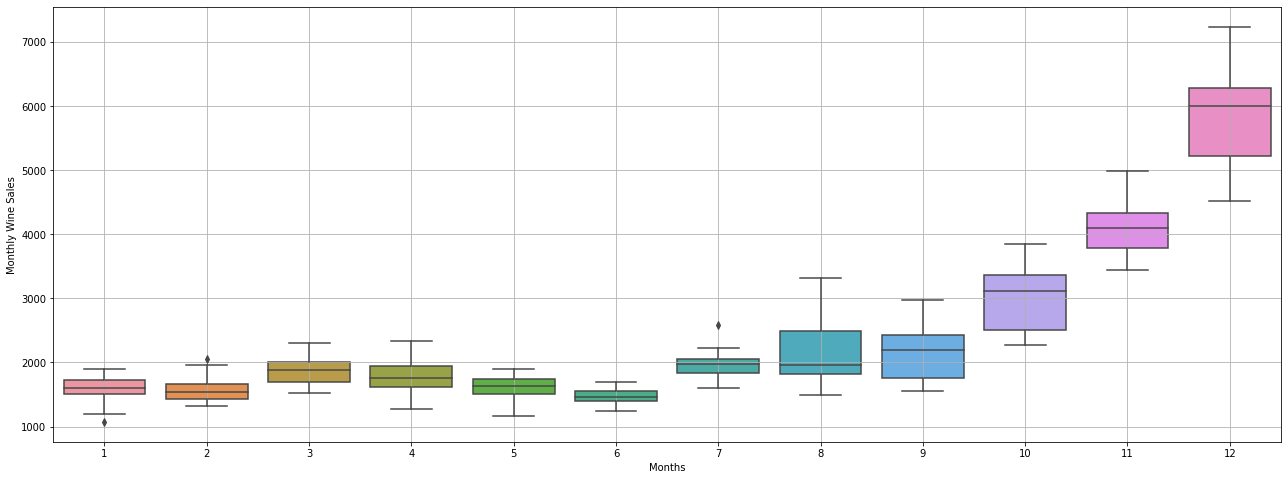

In [13]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Wine Sales');

#### MonthPlot for TimeSeries

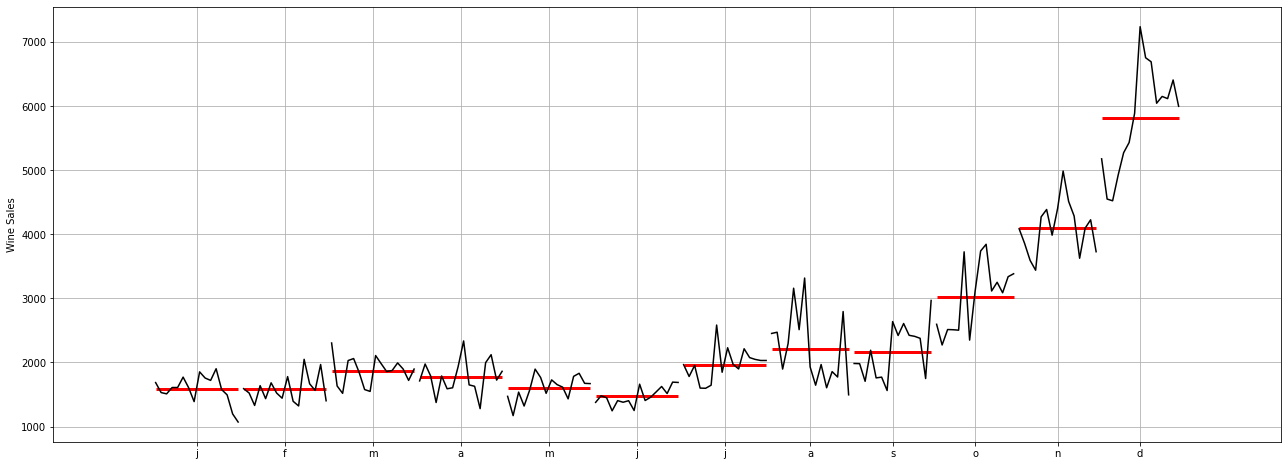

In [14]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel='Wine Sales', ax=ax)  #input is df
plt.grid();

In [15]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df_1.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


#### Monthly Sales Across Years

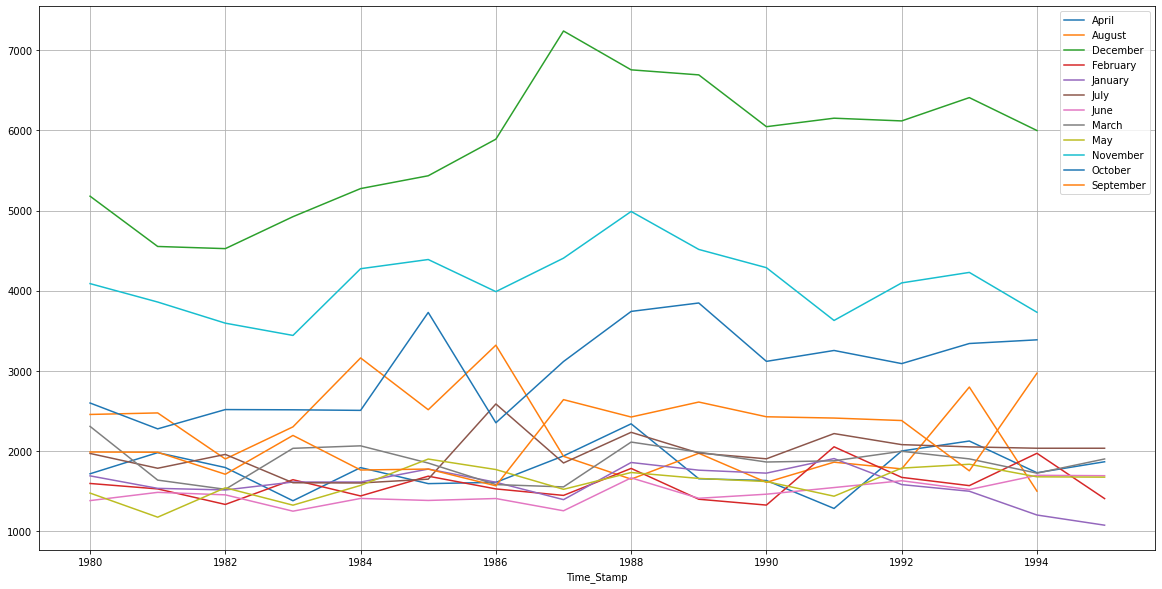

In [16]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

#### Empirical Cumulative Distribution

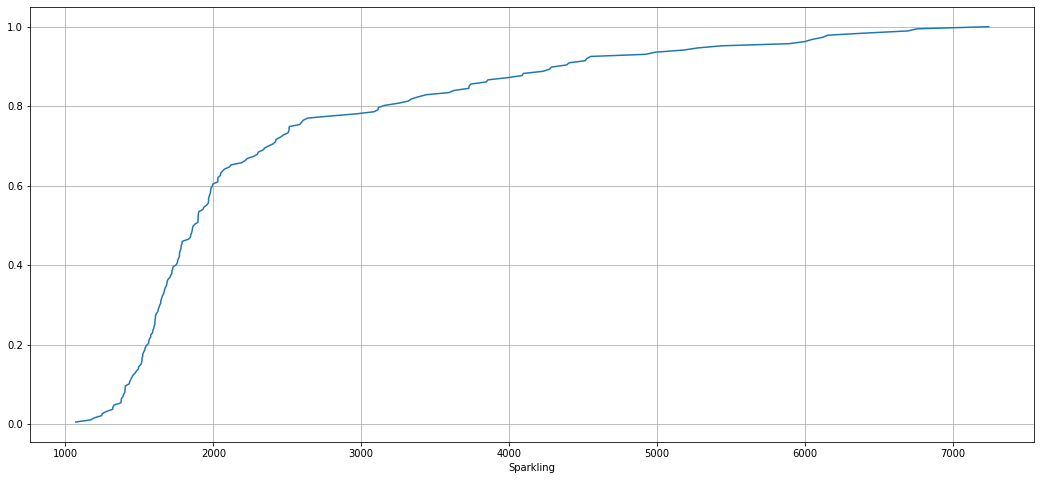

In [17]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

#### Yearly Plot

In [18]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

,Sparkling
Time_Stamp,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431


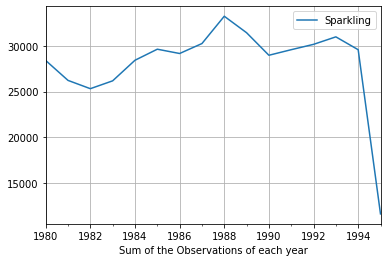

In [19]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [20]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

,Sparkling
Time_Stamp,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000


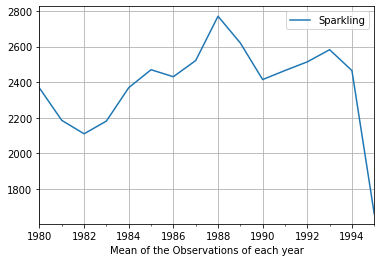

In [21]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

#### Quarterly Plot

In [22]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

,Sparkling
Time_Stamp,
1980-03-31,5581
1980-06-30,4560
1980-09-30,6403
1980-12-31,11862
1981-03-31,4686


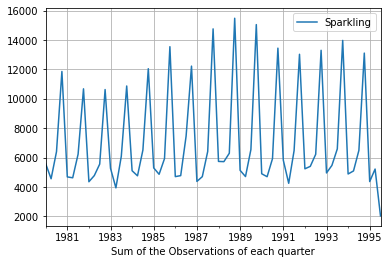

In [23]:
df_quarterly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each quarter');

In [24]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

,Sparkling
Time_Stamp,
1980-03-31,1860.333333
1980-06-30,1520.000000
1980-09-30,2134.333333
1980-12-31,3954.000000
1981-03-31,1562.000000


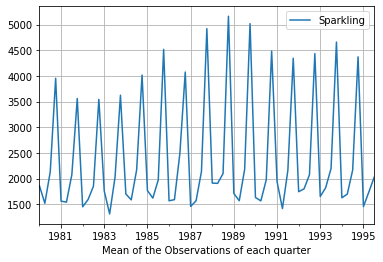

In [25]:
df_quarterly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each quarter');

#### Decade Plot

In [26]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum

,Sparkling
Time_Stamp,
1980-12-31,28406
1990-12-31,288893
2000-12-31,131953


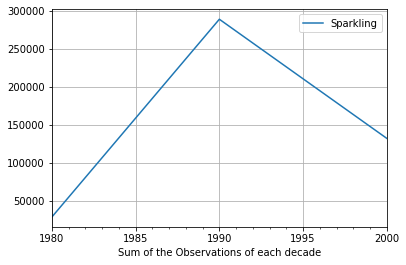

In [27]:
df_decade_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each decade');

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

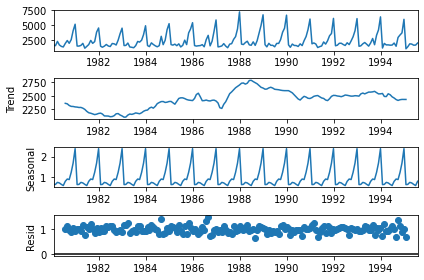

In [29]:
decomposition = seasonal_decompose(df ,model='multiplicative')
decomposition.plot();

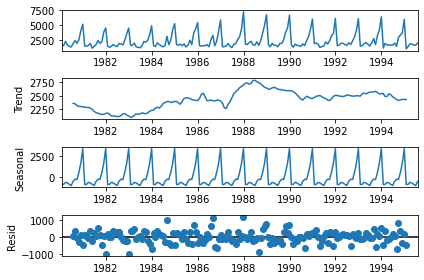

In [30]:
decomposition1 = seasonal_decompose(df ,model='additive')
decomposition1.plot();

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [32]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2361.695896
1980-08-31    2352.468741
1980-09-30    2321.497620
1980-10-31    2304.490847
1980-11-30    2303.092089
1980-12-31    2294.738436
dtype: float64

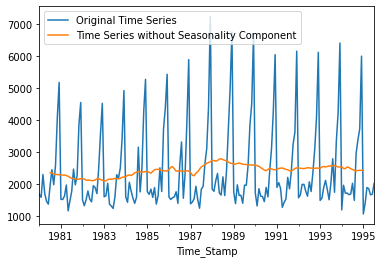

In [33]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

## 3.Split Train and Test

In [34]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [35]:
print(train.shape)
print (test.shape)

(132, 1)
(55, 1)


In [36]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



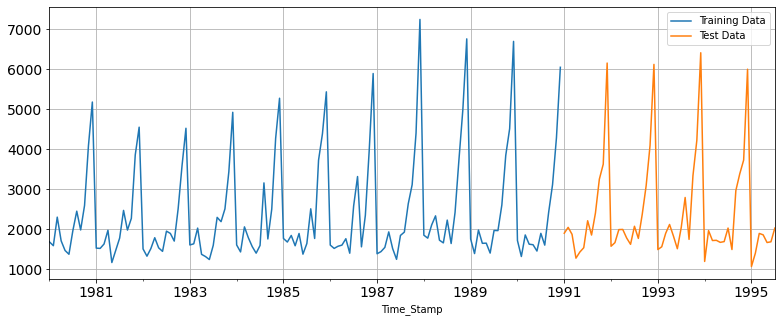

In [37]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Different models

### Model 1: Linear Regression

In [38]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [39]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

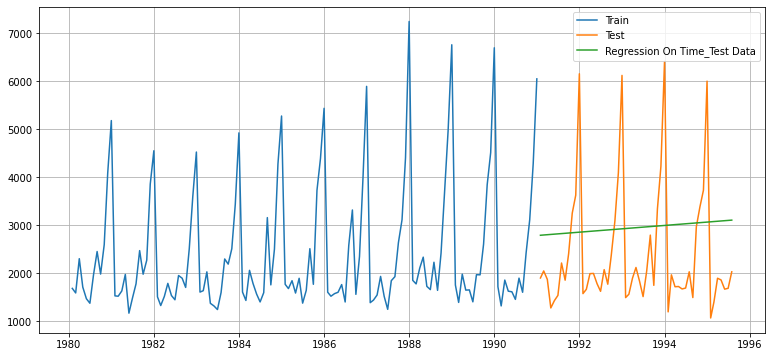

In [41]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot  ( train['Sparkling'],                     label='Train')
plt.plot  ( test['Sparkling'],                      label='Test')
plt.plot  (LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [42]:
from sklearn import metrics

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [43]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['LinearRegression'])
resultsDf

,RMSE
LinearRegression,1389.135175


### Model 2: Naive Approach

In [44]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

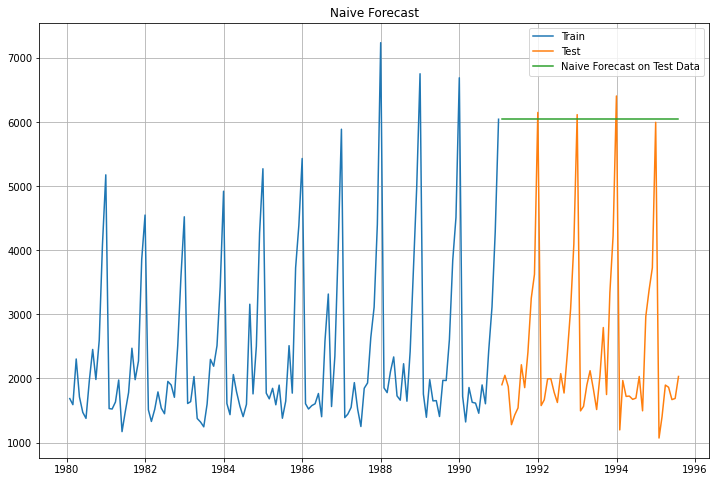

In [45]:
plt.figure(figsize=(12,8))
plt.plot( NaiveModel_train['Sparkling'],      label='Train')
plt.plot(test['Sparkling'],                  label='Test')
plt.plot(NaiveModel_test['naive'],      label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [46]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [47]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,RMSE
LinearRegression,1389.135175
NaiveModel,3864.279352


### Method 3: Simple Average

In [48]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


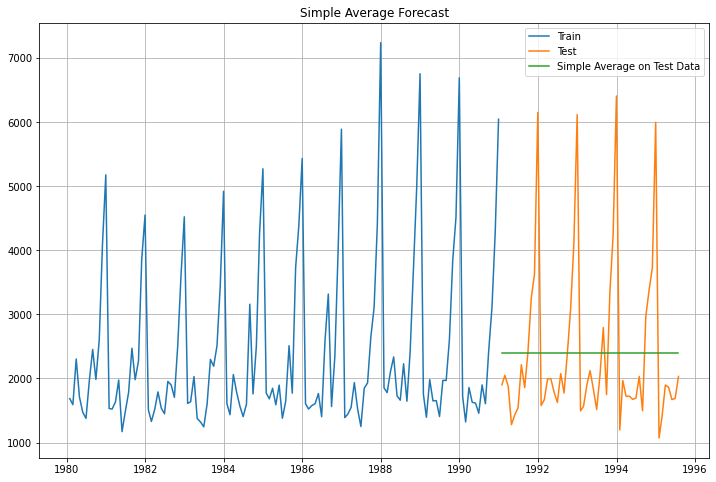

In [49]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [50]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [51]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE
LinearRegression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


### Method 4: Moving Average

In [52]:
MovingAverage = df.copy()
MovingAverage.head()

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_5'] = MovingAverage['Sparkling'].rolling(5).mean()
MovingAverage['Trailing_8'] = MovingAverage['Sparkling'].rolling(8).mean()

MovingAverage.head(10)

,Sparkling,Trailing_2,Trailing_5,Trailing_8
Time_Stamp,,,,
1980-01-31,1686,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN
1980-04-30,1712,2008.0,NaN,NaN
1980-05-31,1471,1591.5,1752.8,NaN
1980-06-30,1377,1424.0,1691.0,NaN
1980-07-31,1966,1671.5,1766.0,NaN
1980-08-31,2453,2209.5,1795.8,1820.000
1980-09-30,1984,2218.5,1850.2,1857.250


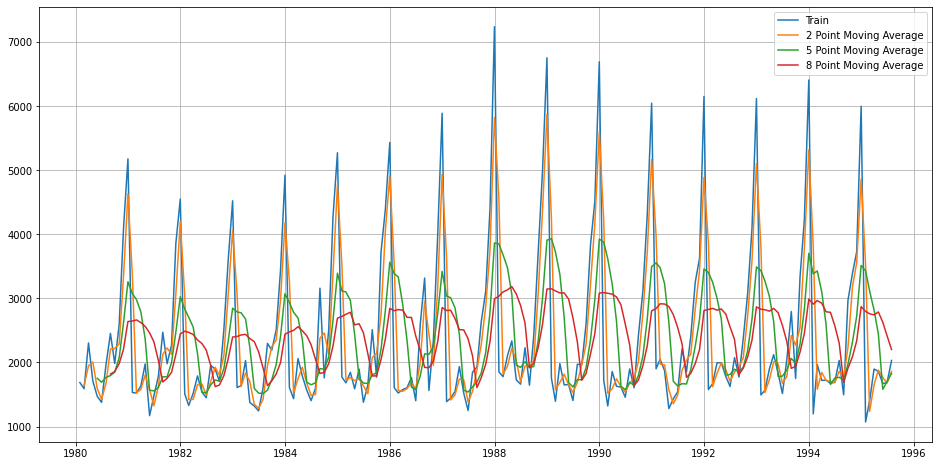

In [53]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_5'], label='5 Point Moving Average')
plt.plot(MovingAverage['Trailing_8'],label = '8 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

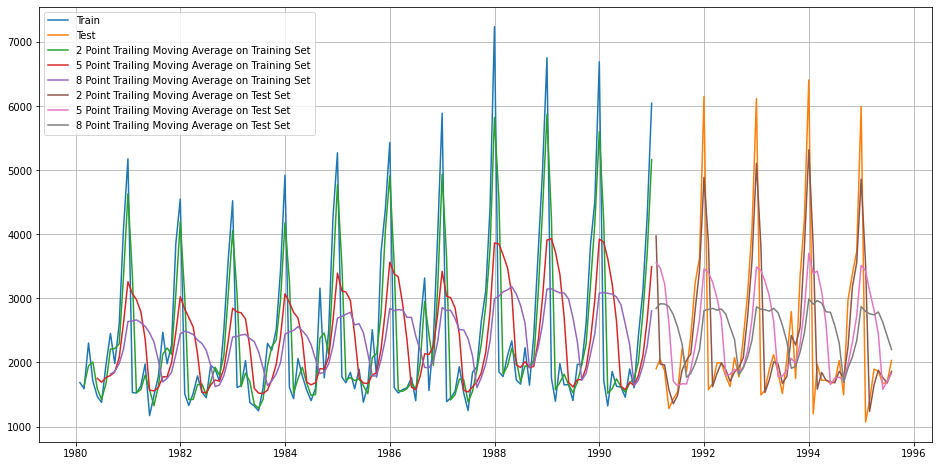

In [54]:
#Creating train and test set 
trailing_MovingAverage_train =  MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test  =  MovingAverage[MovingAverage.index.year >= 1991]

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'],  label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_5'], label='5 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_8'],label = '8 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_5'], label='5 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_8'],label = '8 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [55]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 5 point Trailing MA

rmse_model4_test_5 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_5'],squared=False)
print("For 5 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_5))

## Test Data - RMSE --> 8 point Trailing MA

rmse_model4_test_8 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_8'],squared=False)
print("For 8 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_8))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 5 point Moving Average Model forecast on the Training Data,  RMSE is 1234.045
For 8 point Moving Average Model forecast on the Training Data,  RMSE is 1342.568


In [56]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_5
                                          ,rmse_model4_test_8]}
                           ,index=['2pointTrailingMovingAverage','5pointTrailingMovingAverage'
                                   ,'8pointTrailingMovingAverage'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,RMSE
LinearRegression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
5pointTrailingMovingAverage,1234.045344
8pointTrailingMovingAverage,1342.567772


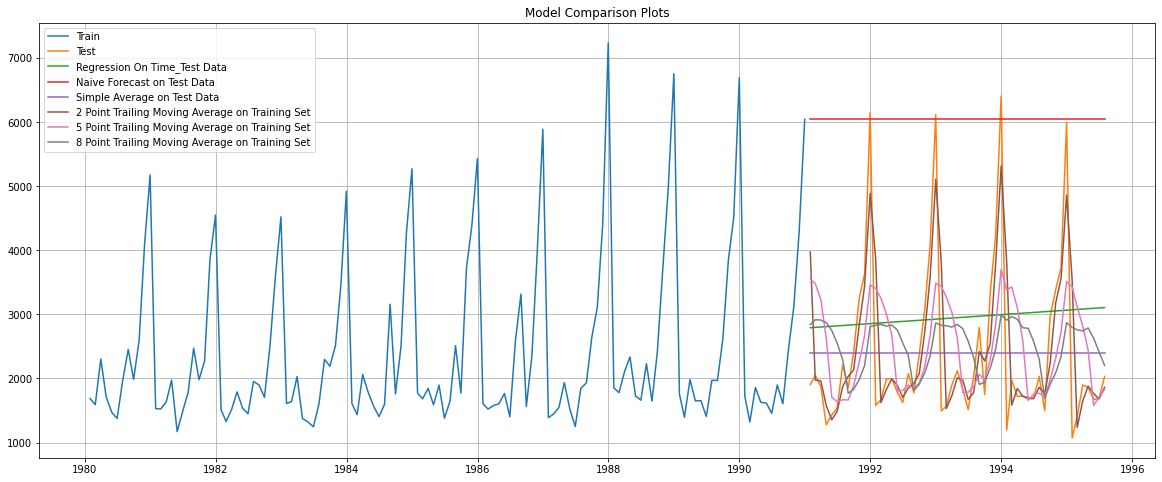

In [57]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_5'], label='5 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_8'], label='8 Point Trailing Moving Average on Training Set')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Method 5: Simple Exponential Smoothing

In [58]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Sparkling'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [59]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2724.932624
1991-02-28,2049,2724.932624
1991-03-31,1874,2724.932624
1991-04-30,1279,2724.932624
1991-05-31,1432,2724.932624


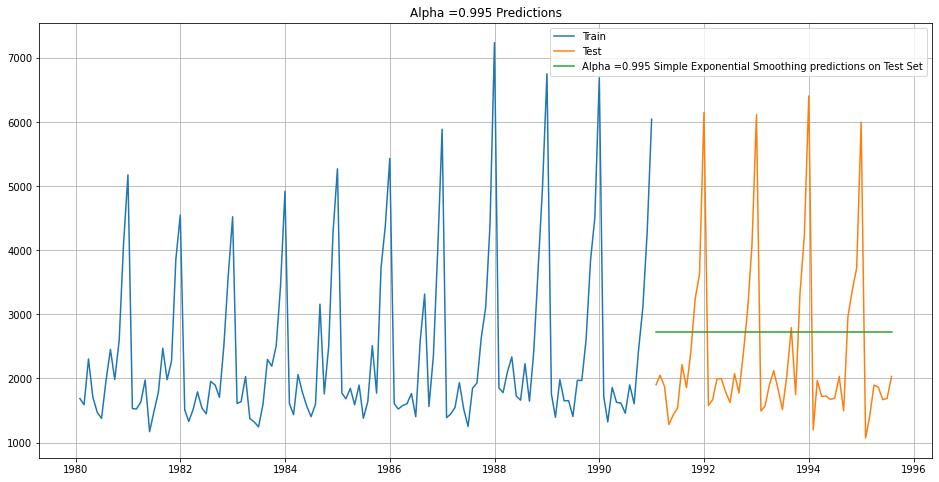

In [60]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [61]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [62]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model5_test_1]},index=['SimpleExponentialSmoothing @Alpha=0.995'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,RMSE
LinearRegression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
5pointTrailingMovingAverage,1234.045344
8pointTrailingMovingAverage,1342.567772
SimpleExponentialSmoothing @Alpha=0.995,1316.035487


In [63]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=70)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)
    
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)    

,Alpha Values,Train RMSE,Test RMSE
0,0.1,1333.873836,1375.393398
1,0.2,1356.042987,1595.206839
2,0.3,1359.511747,1935.507132
3,0.4,1352.588879,2311.919615
4,0.5,1344.004369,2666.351413
5,0.6,1338.805381,2979.204388
6,0.7,1338.844308,3249.944092
7,0.8,1344.462091,3483.801006
8,0.9,1355.723518,3686.794285


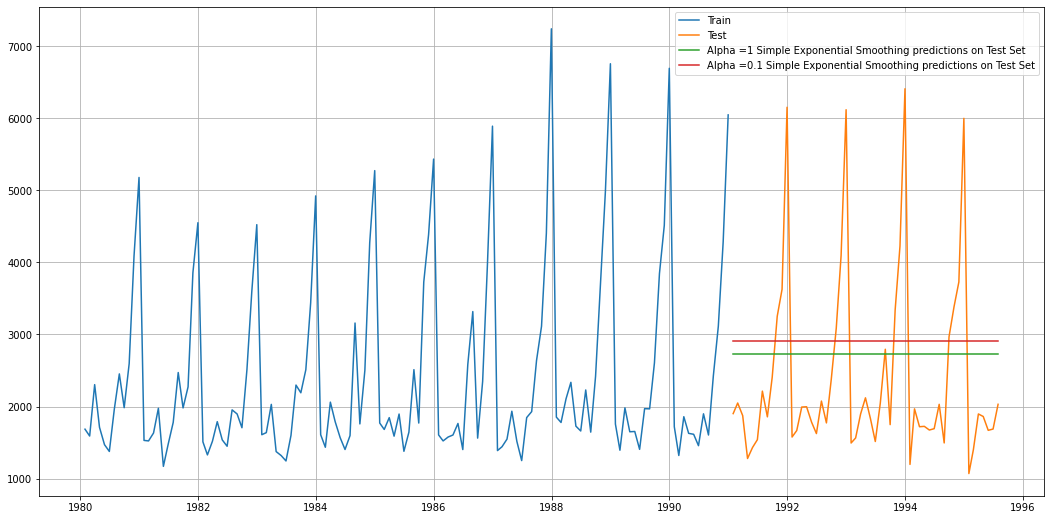

In [64]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [65]:
resultsDf_6_1 = pd.DataFrame({'RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['SimpleExponentialSmoothing @Alpha=0.1'])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,RMSE
LinearRegression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
5pointTrailingMovingAverage,1234.045344
8pointTrailingMovingAverage,1342.567772
SimpleExponentialSmoothing @Alpha=0.995,1316.035487
SimpleExponentialSmoothing @Alpha=0.1,1375.393398


### Method 6: Double Exponential Smoothing (Holt's Model)

In [66]:
DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train['Sparkling'])
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})

In [67]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=70)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test
                                          }, ignore_index=True)      
    

In [68]:
 resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
10,0.2,0.1,1418.041591,3611.763322
2,0.1,0.3,1445.762015,4293.084674
20,0.3,0.1,1431.169601,5908.185554


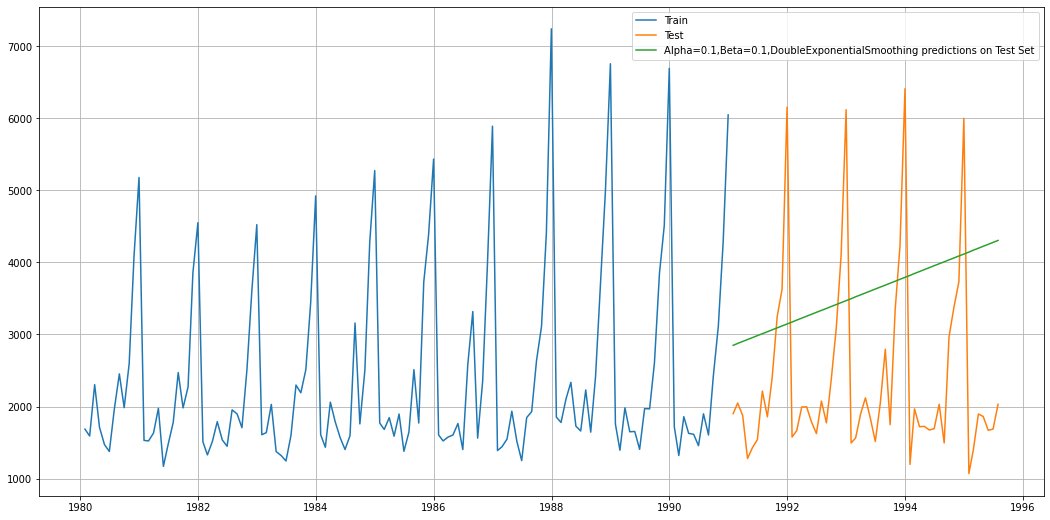

In [69]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [70]:
resultsDf_7_1 = pd.DataFrame({'RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1'])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,RMSE
LinearRegression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
5pointTrailingMovingAverage,1234.045344
8pointTrailingMovingAverage,1342.567772
SimpleExponentialSmoothing @Alpha=0.995,1316.035487
SimpleExponentialSmoothing @Alpha=0.1,1375.393398
"DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1",1778.564670


### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [71]:
TES_train = train.copy()
TES_test = test.copy()

model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_autofit = model_TES.fit()
model_TES_autofit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1577.224489
1991-02-28,2049,1333.677558
1991-03-31,1874,1745.945679
1991-04-30,1279,1630.411925
1991-05-31,1432,1523.289070


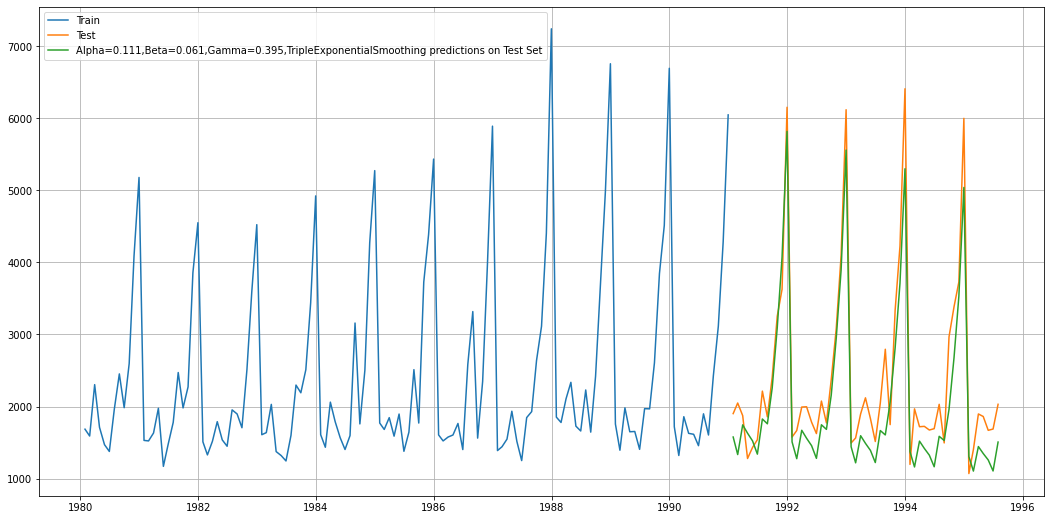

In [73]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [74]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.768


In [75]:
resultsDf_8_1 = pd.DataFrame({'RMSE': [rmse_model6_test_1]}
                           ,index=['TripleExponentialSmoothing @Alpha=0.111,Beta=0.061,Gamma=0.395'])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,RMSE
LinearRegression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
5pointTrailingMovingAverage,1234.045344
8pointTrailingMovingAverage,1342.567772
SimpleExponentialSmoothing @Alpha=0.995,1316.035487
SimpleExponentialSmoothing @Alpha=0.1,1375.393398
"DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1",1778.564670
"TripleExponentialSmoothing @Alpha=0.111,Beta=0.061,Gamma=0.395",469.767970


In [76]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=70)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [77]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
301,0.4,0.1,0.2,389.772245,336.715250
211,0.3,0.2,0.2,395.529174,350.145204
110,0.2,0.2,0.1,405.333164,352.571689
200,0.3,0.1,0.1,394.630053,352.607849
20,0.1,0.3,0.1,414.423963,354.534561


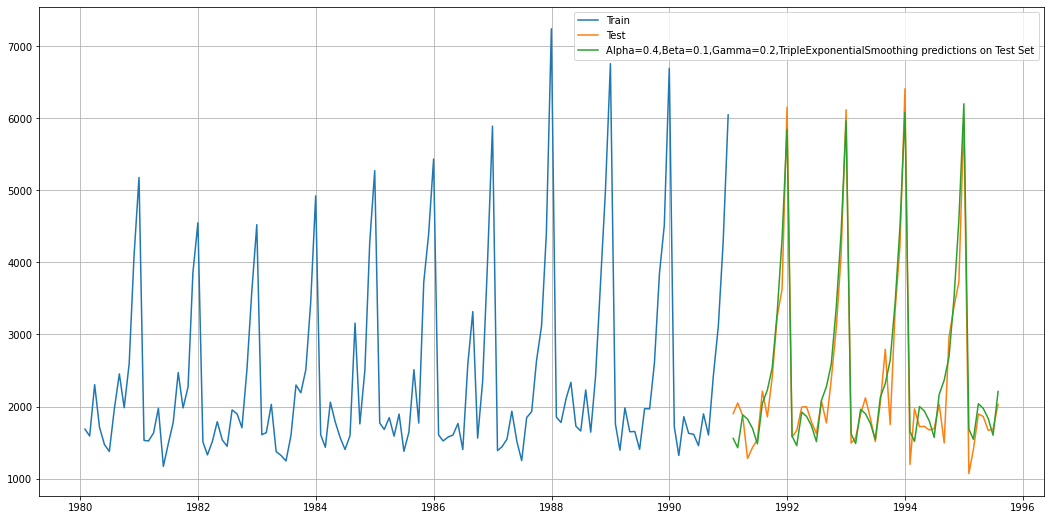

In [78]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [79]:
resultsDf_8_3 = pd.DataFrame({'RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['TripleExponentialSmoothing @Alpha=0.4,Beta=0.1,Gamma=0.2'])
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,RMSE
LinearRegression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
5pointTrailingMovingAverage,1234.045344
8pointTrailingMovingAverage,1342.567772
SimpleExponentialSmoothing @Alpha=0.995,1316.035487
SimpleExponentialSmoothing @Alpha=0.1,1375.393398
"DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1",1778.564670
"TripleExponentialSmoothing @Alpha=0.111,Beta=0.061,Gamma=0.395",469.767970


In [80]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['RMSE'])

Sorted by RMSE values on the Test Data: 



,RMSE
"TripleExponentialSmoothing @Alpha=0.4,Beta=0.1,Gamma=0.2",336.715250
"TripleExponentialSmoothing @Alpha=0.111,Beta=0.061,Gamma=0.395",469.767970
2pointTrailingMovingAverage,813.400684
5pointTrailingMovingAverage,1234.045344
SimpleAverageModel,1275.081804
SimpleExponentialSmoothing @Alpha=0.995,1316.035487
8pointTrailingMovingAverage,1342.567772
SimpleExponentialSmoothing @Alpha=0.1,1375.393398
LinearRegression,1389.135175
"DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1",1778.564670


In [81]:
resultsDf1=resultsDf.copy()

### Plot to compare the Exponential Models

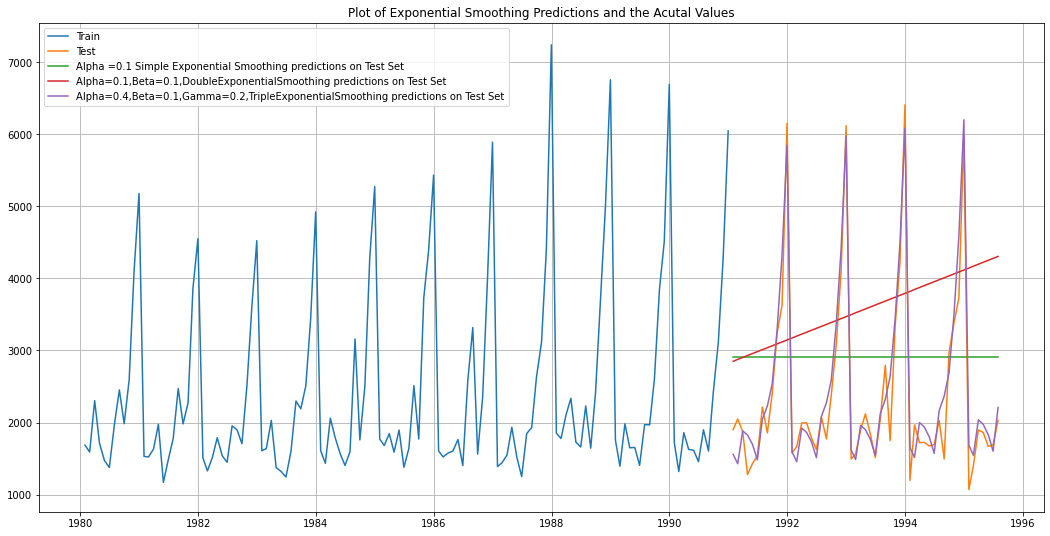

In [82]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

### Build the Best Model

In [83]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)

In [84]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)
print('RMSE:',RMSE_fullmodel1)

RMSE: 377.29032542281715


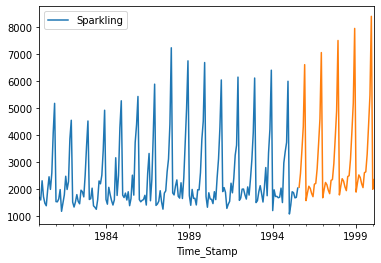

In [85]:
prediction_1 = fullmodel1.forecast(steps=len(test))
df.plot()
prediction_1.plot();

In [86]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,1321.896024,2063.370030,2804.844037
1995-09-30,1838.303763,2579.777769,3321.251776
1995-10-31,2676.612337,3418.086343,4159.560350
1995-11-30,3567.115379,4308.589385,5050.063392
1995-12-31,5874.310141,6615.784148,7357.258154


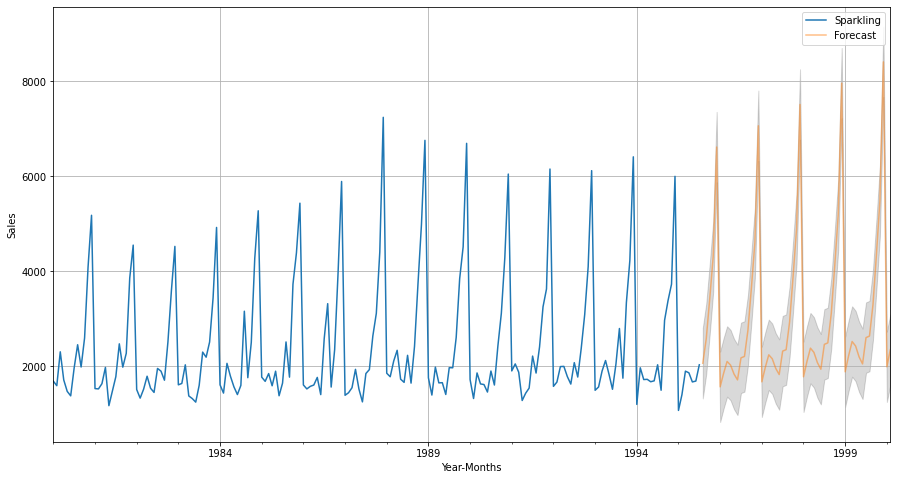

In [87]:
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

### 5.Checking Stationarity

In [88]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

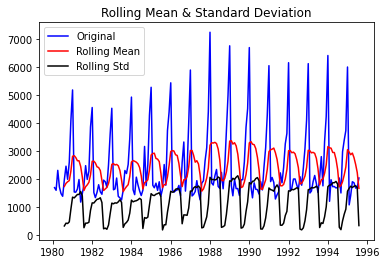

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [89]:
test_stationarity(df)

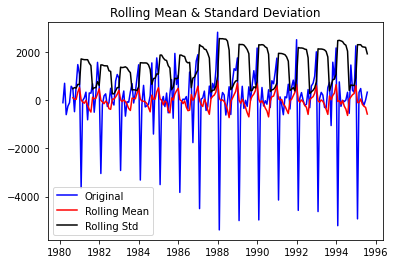

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [90]:
test_stationarity(df.diff().dropna())

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

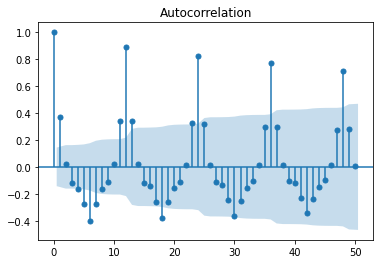

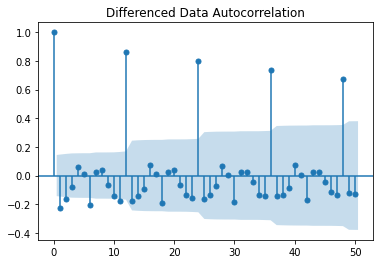

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df,lags=50)
plot_acf(df.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

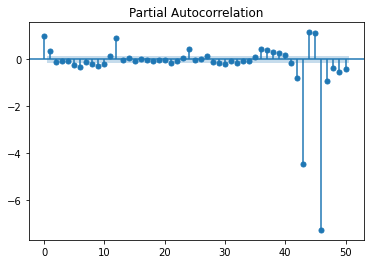

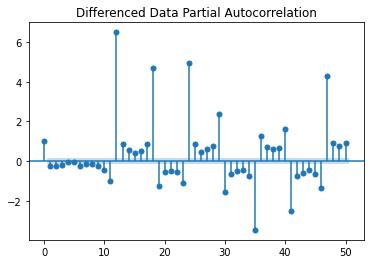

In [92]:
plot_pacf(df,lags=50)
plot_pacf(df.diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Checking Stationarity of Train set

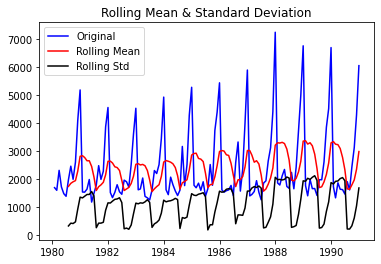

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [93]:
test_stationarity(train)

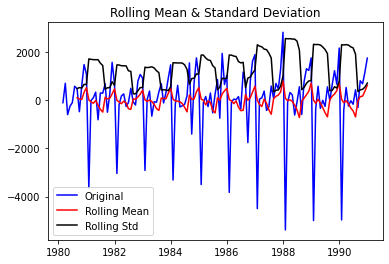

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [94]:
test_stationarity(train.diff().dropna())

### 6.Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [95]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [96]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train.values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)    

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437115225
ARIMA(0, 1, 2) - AIC:2232.7830976841665
ARIMA(1, 1, 0) - AIC:2268.5280605942976
ARIMA(1, 1, 1) - AIC:2235.0139453494457
ARIMA(1, 1, 2) - AIC:2233.5976471189274
ARIMA(2, 1, 0) - AIC:2262.0356001096925
ARIMA(2, 1, 1) - AIC:2232.360489886391
ARIMA(2, 1, 2) - AIC:2210.6189875760692


In [97]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.618988
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [98]:
auto_ARIMA = ARIMA(train, order=(2,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.929
Date:                Sat, 24 Apr 2021   AIC                           2210.619
Time:                        17:10:28   BIC                           2227.870
Sample:                    02-29-1980   HQIC                          2217.629
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.517     10.806      0.000       4.572       6.598
ar.L1.D.Sparkling     1.2699      0.075     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

#### Predict on the Test Set using this model and evaluate the model.

In [99]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test,predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.484105408576


In [100]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA_AIC(2,1,2)'])
resultsDf

,RMSE
"ARIMA_AIC(2,1,2)",1374.484105


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

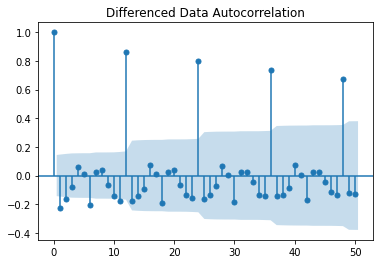

In [101]:
plot_acf(df.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### 6 month seasonality

In [102]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [103]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train.values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171629
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.63555368896
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844433514
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.936011814821
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872265
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510443
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657127
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339544094
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242877799
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.51742981393
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093277683998
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510402788
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933217916
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.703707108539
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187

In [104]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.678698
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888814
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.703707
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.330541
71,"(2, 1, 1)","(2, 0, 2, 6)",1744.040751


In [105]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train.values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sat, 24 Apr 2021   AIC                           1727.679
Time:                                   17:11:01   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.256      0.024      -1.205      -0.085
ma.L1         -0.1068      0.250     -0.428

#### Predict on the Test Set using this model and evaluate the model.

In [106]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1330.382316,380.556609,584.505068,2076.259563
1,1177.257047,392.107264,408.740930,1945.773163
2,1625.929998,392.301428,857.033328,2394.826668
3,1546.321157,397.701601,766.840342,2325.801971
4,1308.751650,398.920807,526.881235,2090.622066


In [107]:
rmse = mean_squared_error(test,predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.9311377848303


In [108]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_AIC(1,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_AIC(2,1,2)",1374.484105
"SARIMA_AIC(1,1,2)(2,0,2,6)",626.931138


#### 12 month seasonality

In [109]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [110]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train.values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846681
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235787
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530138973
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791164
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610053
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920817
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566444
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572878215
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881839018
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319376473
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509143900523
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178783
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085614381
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018823676988
SARIMA(0, 1, 

In [111]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.076771
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [112]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train.values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sat, 24 Apr 2021   AIC                           1555.584
Time:                                    17:11:49   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

#### Predict on the Test Set using this model and evaluate the model.

In [113]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.416698,388.338122,566.287965,2088.545430
1,1315.162146,402.001930,527.252842,2103.071450
2,1621.635228,401.995527,833.738474,2409.531983
3,1598.910009,407.232465,800.749045,2397.070973
4,1392.734434,407.962339,593.142942,2192.325926


In [114]:
rmse = mean_squared_error(test,predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5668170366393


In [115]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_AIC(1,1,2)(1,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_AIC(2,1,2)",1374.484105
"SARIMA_AIC(1,1,2)(2,0,2,6)",626.931138
"SARIMA_AIC(1,1,2)(1,0,2,12)",528.566817


### 7.Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

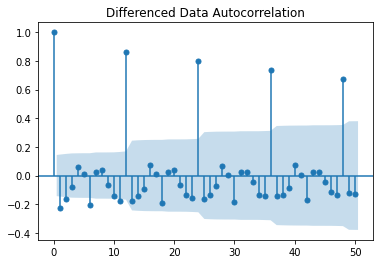

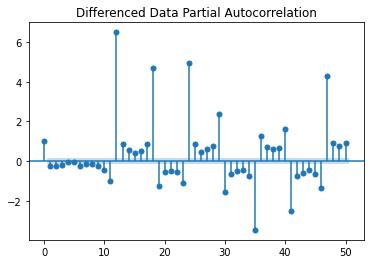

In [116]:
plot_acf(df.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df.diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [117]:
manual_ARIMA = ARIMA(train.astype('float64'), order=(2,1,0),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1127.018
Method:                       css-mle   S.D. of innovations           1317.723
Date:                Sat, 24 Apr 2021   AIC                           2262.036
Time:                        17:11:49   BIC                           2273.536
Sample:                    02-29-1980   HQIC                          2266.709
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                27.0918     80.017      0.339      0.735    -129.738     183.922
ar.L1.D.Sparkling    -0.1929      0.085     -2.271      0.023      -0.360      -0.026
ar.L2.D.Sparkling    -0.

#### Predict on the Test Set using this model and evaluate the model.

In [118]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test,predicted_manual_ARIMA[0],squared=False)
print(rmse)

3908.035724480446


In [119]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA_ACF/PACF(2,1,0)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_AIC(2,1,2)",1374.484105
"SARIMA_AIC(1,1,2)(2,0,2,6)",626.931138
"SARIMA_AIC(1,1,2)(1,0,2,12)",528.566817
"ARIMA_ACF/PACF(2,1,0)",3908.035724


### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. 

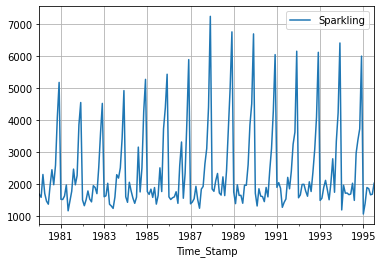

In [120]:
df.plot()
plt.grid();

#### 6 month seasonality

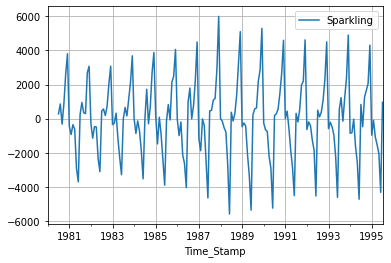

In [121]:
(df.diff(6)).plot()
plt.grid();

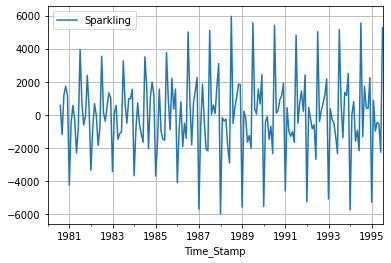

In [122]:
(df.diff(6)).diff().plot()
plt.grid();

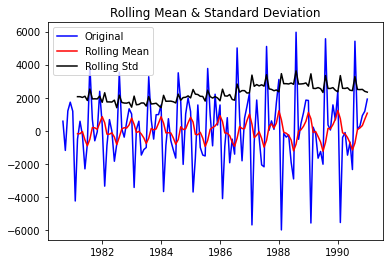

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [123]:
test_stationarity((train.diff(6).dropna()).diff(1).dropna())

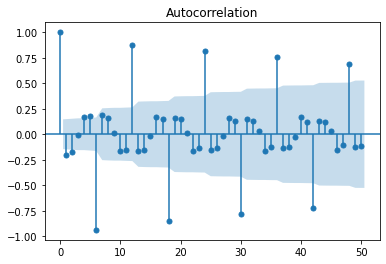

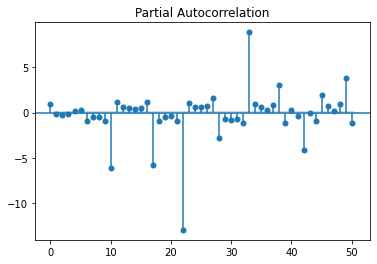

In [124]:
plot_acf((df.diff(6).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df.diff(6).dropna()).diff(1).dropna(),lags=50);

In [125]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train.values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -811.726
Date:                                   Sat, 24 Apr 2021   AIC                           1633.452
Time:                                           17:11:50   BIC                           1646.770
Sample:                                                0   HQIC                          1638.850
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0176      0.015    -68.685      0.000    

#### Predict on the Test Set using this model and evaluate the model.

In [126]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,907.314903,510.711730,-93.661694,1908.291499
1,529.980659,722.254743,-885.612624,1945.573943
2,1125.426914,884.577501,-608.313131,2859.166958
3,933.719009,1021.421949,-1068.231224,2935.669243
4,743.534275,1141.984344,-1494.713910,2981.782459


In [127]:
rmse = mean_squared_error(test,predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

1914.8833649853912


In [128]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_ACF/PACF(0,1,0)(1,1,3,6)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA_AIC(2,1,2)",1374.484105
"SARIMA_AIC(1,1,2)(2,0,2,6)",626.931138
"SARIMA_AIC(1,1,2)(1,0,2,12)",528.566817
"ARIMA_ACF/PACF(2,1,0)",3908.035724
"SARIMA_ACF/PACF(0,1,0)(1,1,3,6)",1914.883365


In [129]:
resultsDf2=resultsDf.copy()

## 8. ResultSet based on RMSE values

In [130]:
a=[resultsDf1,resultsDf2]
resultset= pd.concat(a)
resultset

,RMSE
LinearRegression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
5pointTrailingMovingAverage,1234.045344
8pointTrailingMovingAverage,1342.567772
SimpleExponentialSmoothing @Alpha=0.995,1316.035487
SimpleExponentialSmoothing @Alpha=0.1,1375.393398
"DoubleExponentialSmoothing @Alpha=0.1,Beta=0.1",1778.564670
"TripleExponentialSmoothing @Alpha=0.111,Beta=0.061,Gamma=0.395",469.767970


In [131]:
resultset.sort_values(by='RMSE')

,RMSE
"TripleExponentialSmoothing @Alpha=0.4,Beta=0.1,Gamma=0.2",336.715250
"TripleExponentialSmoothing @Alpha=0.111,Beta=0.061,Gamma=0.395",469.767970
"SARIMA_AIC(1,1,2)(1,0,2,12)",528.566817
"SARIMA_AIC(1,1,2)(2,0,2,6)",626.931138
2pointTrailingMovingAverage,813.400684
5pointTrailingMovingAverage,1234.045344
SimpleAverageModel,1275.081804
SimpleExponentialSmoothing @Alpha=0.995,1316.035487
8pointTrailingMovingAverage,1342.567772
"ARIMA_AIC(2,1,2)",1374.484105


### 9.Build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [132]:
full_data_model = sm.tsa.statespace.SARIMAX(df,
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sat, 24 Apr 2021   AIC                           2360.827
Time:                                    17:11:52   BIC                           2382.309
Sample:                                01-31-1980   HQIC                          2369.551
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6609      0.242     -2.734      0.006      -1.135      -0.187
ma.L1         -0.2739      0.200   

In [133]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1836.362650,379.707390,1092.149841,2580.575459
1995-09-30,2489.610462,384.471543,1736.060085,3243.160839
1995-10-31,3324.596841,384.577445,2570.838900,4078.354782
1995-11-30,4020.242509,386.335376,3263.039085,4777.445932
1995-12-31,6290.019811,386.389881,5532.709560,7047.330063


In [134]:
rmse = mean_squared_error(df,results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9823398600539


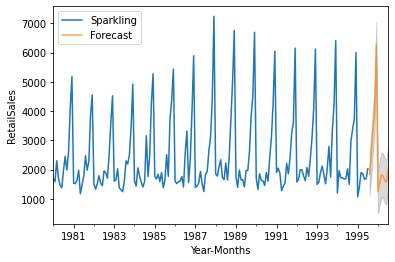

In [135]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

axis = df.plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()